In [9]:
import torch
import torchvision
import matplotlib.pyplot as plt
import pandas as pd
import PIL
import torchvision.transforms as transforms
from torch.utils.data import Dataset
%matplotlib inline

In [155]:
def initial_data_transform(train_ds):
    df_samples_class = []
    df_imgs = pd.DataFrame(train_ds.imgs, columns=['path', 'label'])
    df_imgs['img_name'] = df_imgs['path'].apply(lambda x: x.rsplit('/', 1)[-1])
    df_imgs.to_csv('data_labels_names.csv')
    return

In [77]:
class CelebAImageFolderWithPaths(torchvision.datasets.ImageFolder):
    
    def __getitem__(self, index):

        original_tuple = super(CelebAImageFolderWithPaths, self).__getitem__(index)
        path = self.imgs[index][0]
        tuple_with_path = (original_tuple + (path.rsplit('/', 1)[-1],))
        return tuple_with_path

In [128]:
class CelebADataLoader(Dataset):
    
    def __init__(self,root_dir='data/img_alig_split/'):
        self.root_dir=root_dir
        self.load_data()
        self.load_attributes_files()
        self.load_labels_names_and_files()
        self.merge_data()
        return
    
    def get_images_with_features(self, features):
        condition = None
        for feature in features:
            if condition is None:
                condition = (celeb_loader.img_attr[feature]==1)
            else:
                condition = (celeb_loader.img_attr[feature]==1) & condition
        list_img_conditions = list(
            celeb_loader.img_attr[condition]['img_name']
        )
        imges_features_filteres =[img for i, img in enumerate(self.dataset) 
                       if img[2] in list_img_conditions]
        return imges_features_filteres

    def load_data(self):
        data_path = self.root_dir
        transform = transforms.Compose(
            [transforms.ToTensor()])
        train_dataset = CelebAImageFolderWithPaths(
            root=data_path,
            transform=transform
        )
        train_loader = torch.utils.data.DataLoader(
            train_dataset,
            batch_size=64,
            num_workers=0,
            shuffle=True
        )
        self.dataset=train_dataset
        self.train_loader=train_loader
        return train_dataset, train_loader
    
    def load_data_class(self,target):
        targets = torch.tensor(self.dataset.targets)
        target_idx = (targets==target).nonzero()
        sampler = torch.utils.data.sampler.SubsetRandomSampler(target_idx)
        loader = torch.utils.data.DataLoader(self.dataset,sampler=sampler)
        return loader
    
    def load_attributes_files(self,file_name='data/list_attr_celeba_processed.csv'):
        self.img_attr = pd.read_csv('data/list_attr_celeba_processed.csv')
        return self.img_attr
    
    def load_labels_names_and_files(self,name='data/data_labels_names.csv'):
        self.data_labels = pd.read_csv(name)
        return self.data_labels
    
    def merge_data(self):
        df1=self.img_attr
        df2=self.data_labels
        self.merged = df1.merge(df2, left_on='img_name', right_on='img_name')
        return
   


Loading data loader dataset

In [129]:
celeb_loader = CelebADataLoader()

Loading attributes file

In [74]:
celeb_loader.img_attr.head()

img_name  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                 0                1           1                0   
1  000002.jpg                 0                0           0                1   
2  000003.jpg                 0                0           0                0   
3  000004.jpg                 0                0           1                0   
4  000005.jpg                 0                1           1                0   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Smiling  Straight_Hair  \
0     0      0         0         0           0  ...        1              1   
1     0      0         0         1           0  ...        1              0   
2     0      0         1         0           0  ...        0              0   
3     0      0         0         0           0  ...        0              1   
4     0      0         1         0           0  ...        0              0   

   Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  \
0          0                 1            0                 1   
1          0                 0            0                 0   
2          1                 0            0                 0   
3          0                 1            0                 1   
4          0                 0            0                 1   

   Wearing_Necklace  Wearing_Necktie  Young  Unnamed: 41  
0                 0                0      1          NaN  
1                 0                0      1          NaN  
2                 0                0      1          NaN  
3                 1                0      1          NaN  
4                 0                0      1          NaN  

[5 rows x 42 columns]

In [67]:
print(len(celeb_loader.img_attr['img_name'].unique()))
print(len(celeb_loader.data_labels['img_name'].unique()))

202599
202599


In [68]:
celeb_loader.data_labels.head()

Unnamed: 0                              path  label    img_name
0           0  data/img_alig_split/1/000023.jpg      0  000023.jpg
1           1  data/img_alig_split/1/004506.jpg      0  004506.jpg
2           2  data/img_alig_split/1/006439.jpg      0  006439.jpg
3           3  data/img_alig_split/1/014042.jpg      0  014042.jpg
4           4  data/img_alig_split/1/015216.jpg      0  015216.jpg

In [69]:
celeb_loader.merged.head()

img_name  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                 0                1           1                0   
1  000002.jpg                 0                0           0                1   
2  000003.jpg                 0                0           0                0   
3  000004.jpg                 0                0           1                0   
4  000005.jpg                 0                1           1                0   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Wearing_Earrings  \
0     0      0         0         0           0  ...                 1   
1     0      0         0         1           0  ...                 0   
2     0      0         1         0           0  ...                 0   
3     0      0         0         0           0  ...                 1   
4     0      0         1         0           0  ...                 0   

   Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  Young  \
0            0                 1                 0                0      1   
1            0                 0                 0                0      1   
2            0                 0                 0                0      1   
3            0                 1                 1                0      1   
4            0                 1                 0                0      1   

   Unnamed: 41  Unnamed: 0                                 path  label  
0          NaN       46687  data/img_alig_split/2880/000001.jpg   2268  
1          NaN       48085  data/img_alig_split/2937/000002.jpg   2331  
2          NaN      175964  data/img_alig_split/8692/000003.jpg   8725  
3          NaN      111929  data/img_alig_split/5805/000004.jpg   5518  
4          NaN      189353  data/img_alig_split/9295/000005.jpg   9395  

[5 rows x 45 columns]

In [193]:
df_attrs = celeb_loader.img_attr[celeb_loader.img_attr.columns[1:len(celeb_loader.img_attr.columns)-1]]

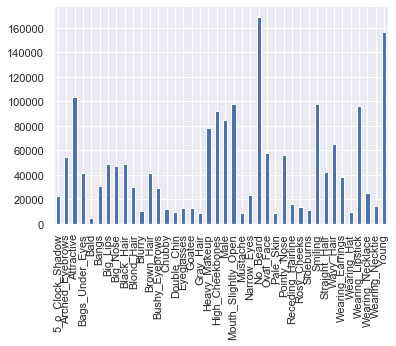

In [197]:
import seaborn as sns
sns.set()
df_attrs.sum().plot(kind="bar")

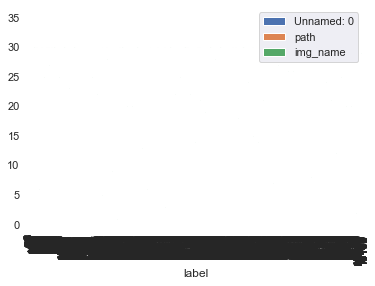

In [198]:
res=celeb_loader.data_labels.groupby('label').count().reindex()
res.plot(kind="bar")

In [219]:
classes_list = celeb_loader.dataset.classes
print(f'Nr classes: {len(classes_list)}')
print(f'Nr samples/class:{res["path"].mean()}')

Nr classes: 10177
Nr samples/class:19.907536602142084


In [82]:
class_0_imgs = celeb_loader.load_data_class(0)

In [83]:
df_0=celeb_loader.merged[celeb_loader.merged['label']==0]
df_0.head()

img_name  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
22     000023.jpg                 1                0           1   
4505   004506.jpg                 0                0           1   
6438   006439.jpg                 0                0           0   
14041  014042.jpg                 0                0           0   
15215  015216.jpg                 0                0           1   

       Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
22                   0     0      0         0         1           0  ...   
4505                 0     0      0         0         0           0  ...   
6438                 0     0      0         0         1           0  ...   
14041                0     0      0         0         0           0  ...   
15215                0     0      0         0         0           0  ...   

       Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  \
22                    0            0                 0                 0   
4505                  0            0                 0                 0   
6438                  0            0                 0                 0   
14041                 0            0                 0                 0   
15215                 0            0                 0                 0   

       Wearing_Necktie  Young  Unnamed: 41  Unnamed: 0  \
22                   0      1          NaN           0   
4505                 0      1          NaN           1   
6438                 0      0          NaN           2   
14041                0      0          NaN           3   
15215                0      1          NaN           4   

                                   path  label  
22     data/img_alig_split/1/000023.jpg      0  
4505   data/img_alig_split/1/004506.jpg      0  
6438   data/img_alig_split/1/006439.jpg      0  
14041  data/img_alig_split/1/014042.jpg      0  
15215  data/img_alig_split/1/015216.jpg      0  

[5 rows x 45 columns]

In [56]:
import numpy as np
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  

000023.jpg


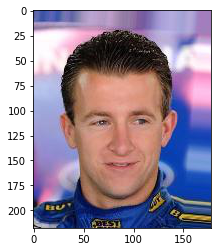

111433.jpg


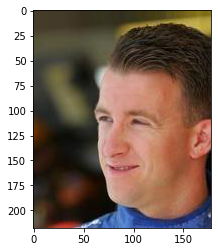

004506.jpg


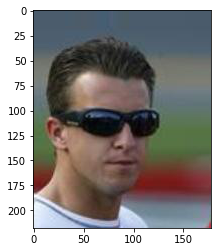

090781.jpg


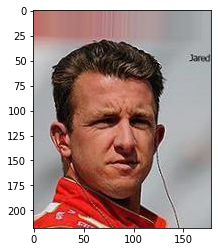

068169.jpg


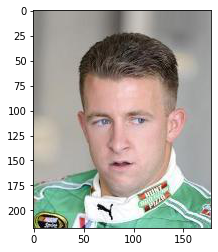

051162.jpg


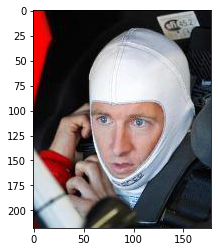

142586.jpg


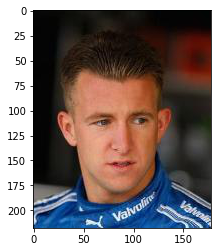

067855.jpg


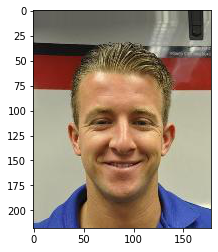

112544.jpg


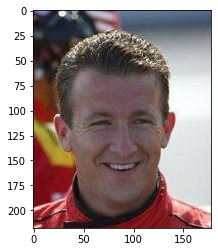

049381.jpg


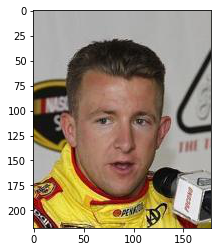

067807.jpg


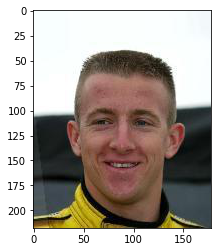

108998.jpg


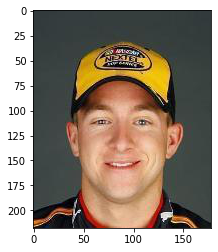

064538.jpg


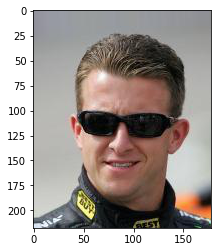

117150.jpg


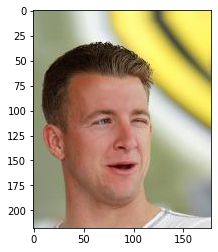

014042.jpg


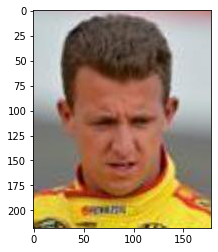

024091.jpg


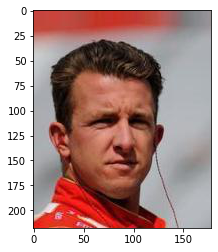

130350.jpg


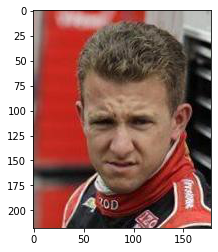

032404.jpg


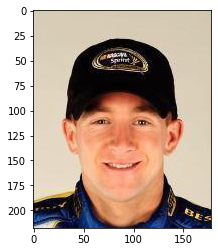

033490.jpg


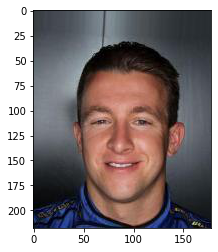

027827.jpg


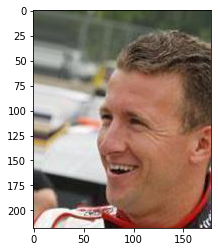

006439.jpg


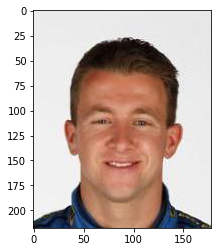

056279.jpg


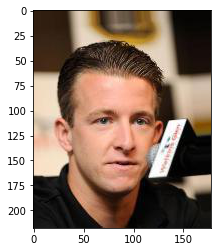

157602.jpg


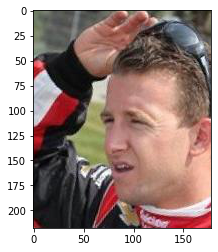

015216.jpg


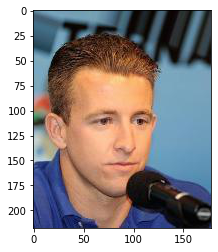

023004.jpg


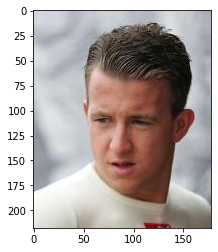

145590.jpg


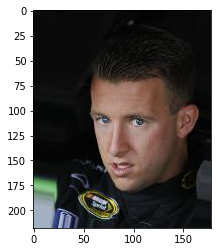

087503.jpg


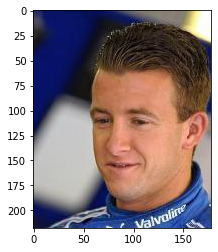

142874.jpg


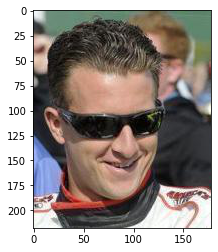

030454.jpg


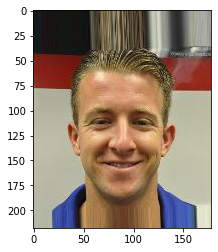

In [98]:
file_names_class_0 = [batch[2][0] for i,batch in enumerate(class_0_imgs)]
file_names_class_0
features_class_0 = celeb_loader.merged[celeb_loader.merged['img_name'].isin(file_names_class_0)]

for i, batch in enumerate(class_0_imgs): 
        print(batch[2][0])
        out = torchvision.utils.make_grid(batch[0])
        imshow(out)

In [100]:
features_class_0[features_class_0['Bags_Under_Eyes']==1]

img_name  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
23003   023004.jpg                 0                0           1   
24090   024091.jpg                 0                0           1   
27826   027827.jpg                 1                0           0   
30453   030454.jpg                 0                0           0   
67806   067807.jpg                 1                0           0   
67854   067855.jpg                 0                0           0   
87502   087503.jpg                 0                0           0   
90780   090781.jpg                 1                0           0   
112543  112544.jpg                 0                0           0   
117149  117150.jpg                 1                0           0   
130349  130350.jpg                 1                0           0   
157601  157602.jpg                 1                0           0   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
23003                 1     0      0         0         0           0  ...   
24090                 1     0      0         0         0           0  ...   
27826                 1     0      0         0         0           0  ...   
30453                 1     0      0         0         1           0  ...   
67806                 1     0      0         0         1           0  ...   
67854                 1     0      0         0         0           0  ...   
87502                 1     0      0         0         0           0  ...   
90780                 1     0      0         0         1           0  ...   
112543                1     0      0         0         0           0  ...   
117149                1     0      0         0         0           0  ...   
130349                1     0      0         0         0           0  ...   
157601                1     0      0         0         0           0  ...   

        Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  \
23003                  0            0                 0                 0   
24090                  0            0                 0                 0   
27826                  0            0                 0                 0   
30453                  0            0                 0                 0   
67806                  0            0                 0                 0   
67854                  0            0                 0                 0   
87502                  0            0                 0                 0   
90780                  0            0                 0                 0   
112543                 0            0                 0                 0   
117149                 0            0                 0                 0   
130349                 0            0                 0                 0   
157601                 0            0                 0                 0   

        Wearing_Necktie  Young  Unnamed: 41  Unnamed: 0  \
23003                 0      1          NaN           5   
24090                 0      0          NaN           6   
27826                 0      0          NaN           7   
30453                 0      1          NaN           8   
67806                 0      1          NaN          15   
67854                 0      1          NaN          16   
87502                 0      1          NaN          18   
90780                 0      0          NaN          19   
112543                0      0          NaN          22   
117149                0      1          NaN          23   
130349                0      0          NaN          24   
157601                0      1          NaN          28   

                                    path  label  
23003   data/img_alig_split/1/023004.jpg      0  
24090   data/img_alig_split/1/024091.jpg      0  
27826   data/img_alig_split/1/027827.jpg      0  
30453   data/img_alig_split/1/030454.jpg      0  
67806   data/img_alig_split/1/067807.jpg      0  
67854   data/img_alig_split/1/067855.jpg

torch.Size([1, 3, 218, 178])

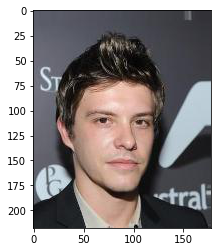

In [75]:
tensor_image = celeb_loader.dataset[100][0]
plt.imshow( tensor_image.permute(1, 2, 0)  )
inputs, classes = next(iter(class_0_imgs))  
inputs.shape

In [130]:
celeb_loader.img_attr.columns

Index(['img_name', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young', 'Unnamed: 41'],
      dtype='object')

In [120]:
list_img_eyeglasses = list(celeb_loader.img_attr[celeb_loader.img_attr['Eyeglasses']==1]['img_name'])

In [123]:
imges_glasses=[img for i, img in enumerate(celeb_loader.dataset) if img[2] in list_img_eyeglasses]

In [131]:
images_with_filters = celeb_loader.get_images_with_features(['Eyeglasses','Sideburns','Pointy_Nose'])

In [132]:
len(images_with_filters)

119

0


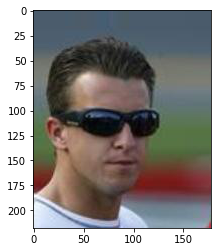

0


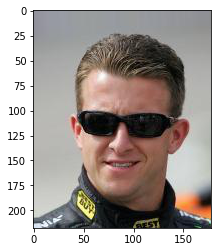

1


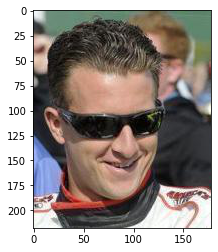

1


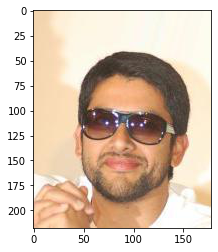

1


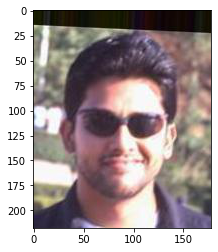

1


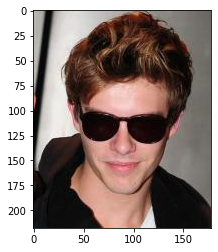

1


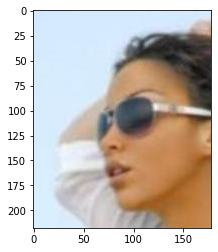

0


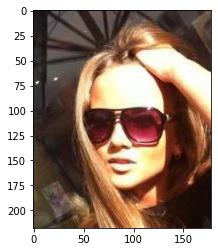

0


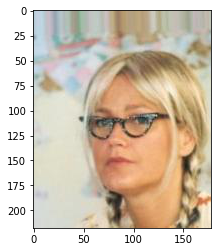

1


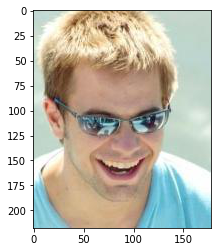

0


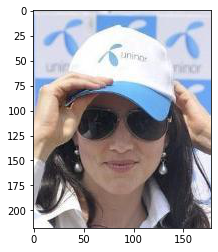

0


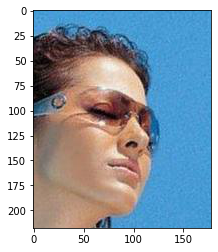

1


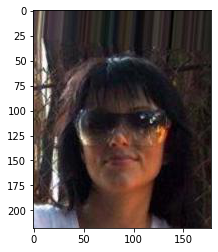

0


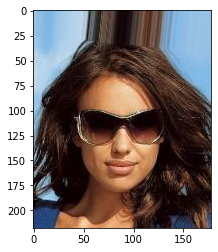

0


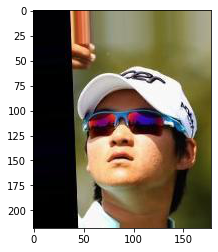

0


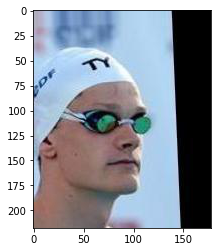

1


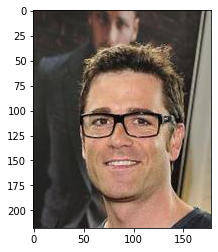

0


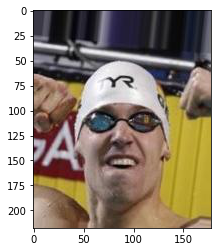

0


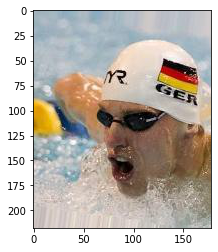

1


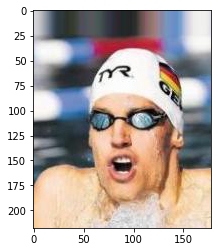

In [127]:
for i, batch in enumerate(imges_glasses[:20]): 
        print(batch[2][0])
        out = torchvision.utils.make_grid(batch[0])
        imshow(out)

0


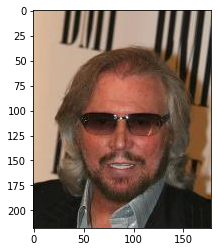

1


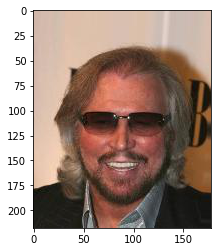

1


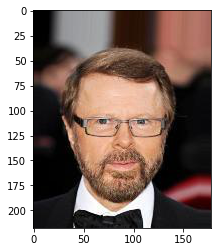

0


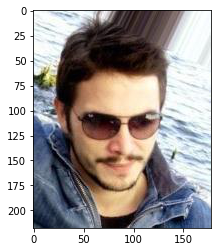

1


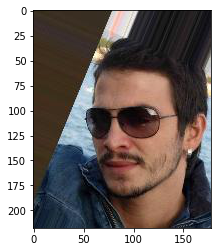

1


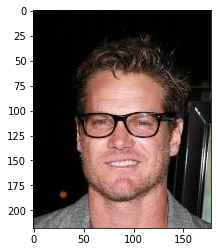

1


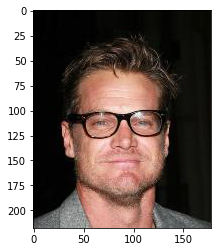

0


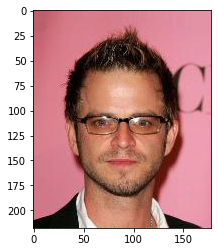

0


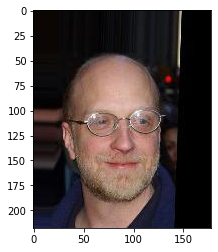

1


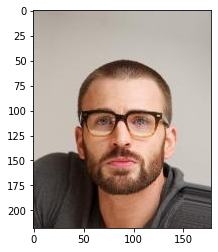

0


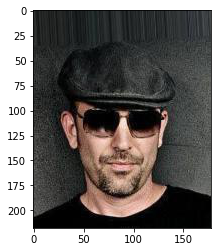

0


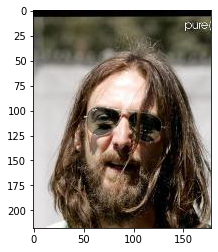

0


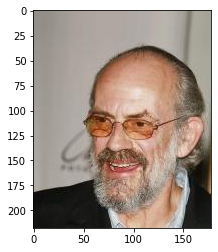

0


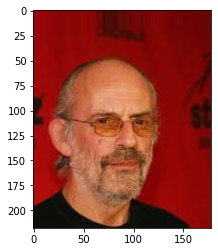

0


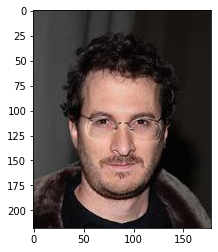

1


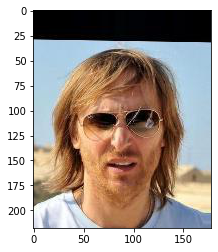

0


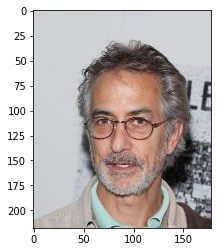

0


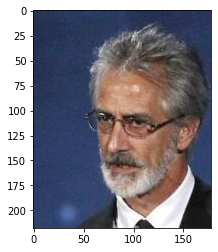

1


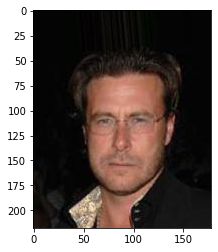

0


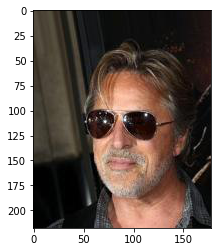

In [133]:
for i, batch in enumerate(images_with_filters[:20]): 
        print(batch[2][0])
        out = torchvision.utils.make_grid(batch[0])
        imshow(out)